In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# Introduction 

Breast cancer is one the most common cancers among women worlwide, representing the majority of new cancer nowdays.


# Data Preparation
The dataset used is a data breast cancer available on sklearn datasets. It was created by Dr. William H.Wolberg, physician at University Of Wisconsin Hospital at Madison, Wisconsin, USA.
Attribute Information:

1- data

2- target

3- target name

4- DESCR

5- Feature name

6- file name

In [39]:

#upload the dataset
df=load_breast_cancer()


In [40]:
# Attribute
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

# Objectives

This analysis aims to observe which features are most helpful in predicting malignant or benign cancer and to see general trends that may aid us in model selection and hyper parameter selection. The goal is to classify whether the breast cancer is benign or malignant. To achieve this we have to used machine learning classification methods to fit a function that can predict the discrete class of new input 

# Data exploration

In [41]:
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

The attribute DESCR has showing there is no missing values on the dataset. Therefore, we will avoid the methond to fix the missing or null data point. Now we will divide the data into "features" and "target". Features (Attributes) are the independent variables while targets (labels) are dependent variables whose values are to predicted. We want to predict malignant or benign cancer.Therefore our attribute set will consist of the "data" with "feature_names" which is stored in the X variable, and the feature will be the "target" column which is stored in y variable.

In [42]:
X = pd.DataFrame(data = df.data, columns = df.feature_names)
y = df.target
X.head()
# shape of the data
X.shape

(569, 30)


We split 80% of the data to the training set while 20% of the data to test set using below code. We will test size to 0.2 and random state to 0.

In [43]:

X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.2,random_state = 0)
# verification of the shape of the split
X_train.shape,X_test.shape

((455, 30), (114, 30))

# Model Selection - Logistic Regression 

Thsi time, we will train the algorithm. For that, we will import LinearRegression class, instantiate it, and call the fit() method along with the training data.

In [44]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The linear regression model will find the best value for the intercept and slope, which results in a line that best fits the data.

In [45]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

3.254299167318477
[ 9.72710109e-02 -1.15570448e-02 -6.19613902e-03 -1.72438014e-04
 -6.69838142e-01  4.31306066e+00 -1.85425371e+00 -1.38787545e+00
 -8.97863083e-01  7.69707767e-01 -7.09631399e-01 -2.34301760e-02
  6.93714504e-02  2.17166018e-04 -9.06854118e+00 -1.38674459e+00
  2.79957081e+00 -5.20565645e+00 -3.57312897e+00  2.28392637e+01
 -1.63480042e-01 -1.09715468e-03 -4.30160106e-03  1.09472199e-03
 -8.42702447e-01 -1.61009590e-01 -2.40937300e-01 -1.06285813e+00
  3.07533881e-02 -5.32268147e+00]


The result should be approximately 3.254299167 and 
 0.9727101 respectively.

This means that for every one unit of change of data with feature name, the change of the target is about 0.97%.

Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute the following script:


In [46]:
y_pred = regressor.predict(X_test)

Comparason of the actual output values for X_test with the predicted values.

In [47]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0,0.226792
1,1,0.810780
2,1,0.980840
3,1,0.800690
4,1,0.967652
...,...,...
109,0,0.536090
110,1,0.850816
111,0,0.058715
112,0,0.165736


comparaison of the Actual and Predicted values

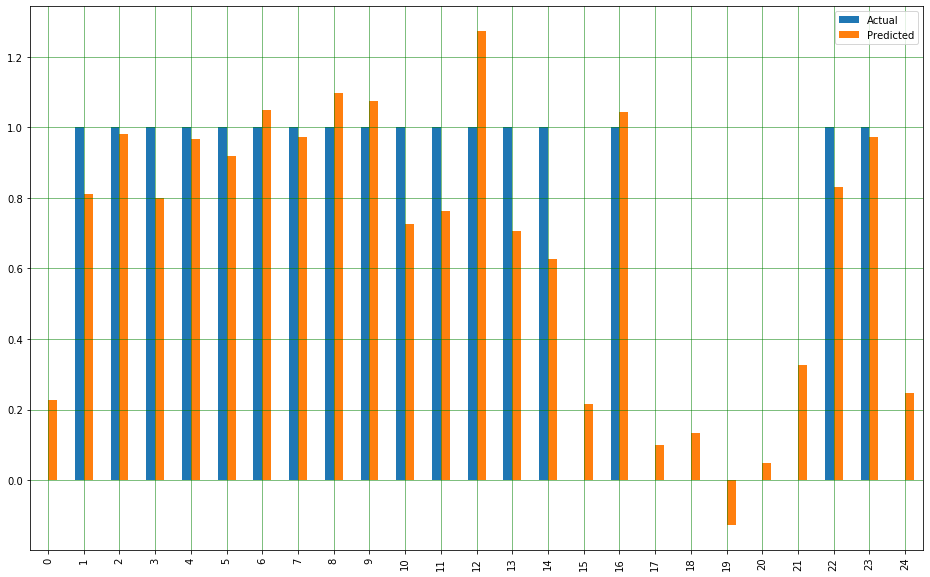

Bar graph showing the difference between Actual and predicted value


In [48]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print("Bar graph showing the difference between Actual and predicted value")

Base on the two observations,the model has returned pretty good prediction results.

The final step is to evaluate the performance of the algorithm. We’ll do this by finding the values for the accuracy, MAE, MSE, and RMSE. Execute the following script:


In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

print("Accuracy : {}".format(knn.score(X_test, y_test)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy : 0.9473684210526315
Mean Absolute Error: 0.19764207472235698
Mean Squared Error: 0.06462030506289251
Root Mean Squared Error: 0.25420524200514144


You can see that the value of root mean squared error is 0.064, which is slightly smaller than 10% . This means that our algorithm was very accurate.


# Model Selection - Recursive Feature Elimination (RFE) 
We will use RFE 

In [50]:
from sklearn.feature_selection import RFE
selec = RFE(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1,), n_features_to_select=15)
selec.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=-1,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [51]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))


In [52]:
selec.get_support()

array([ True,  True,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False])

In [53]:
features = X_train.columns[selec.get_support()]
features

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean concavity', 'mean concave points', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='object')

In [54]:
len(features)


15

In [55]:
X_train_rfe = selec.transform(X_train)
X_test_rfe = selec.transform(X_test)

In [56]:
%%time
run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9736842105263158
CPU times: user 258 ms, sys: 58.3 ms, total: 316 ms
Wall time: 362 ms
